In [2]:
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
import pandas as pd

In [3]:
dataset=pd.read_csv("Two_points_KNN.csv")

In [4]:
dataset.keys()

Index(['-2.543456253616113', '-10.81635752298698', '0'], dtype='object')

In [40]:
dataset.rename(columns={'-2.543456253616113':'C1','-10.81635752298698':'c2','0':'c3'})

,C1,c2,c3
0,9.434466,-2.572000,0
1,3.368646,-10.194671,0
2,1.341407,-4.204140,0
3,9.547758,-2.220580,0
4,-3.533291,6.424351,0
5,0.354240,7.932591,0
6,3.447913,-0.636150,0
7,9.242952,1.407496,0
8,6.475267,5.974660,0
9,5.306609,6.871275,0


In [41]:
x=dataset.iloc[:,:-1].values
y=dataset.iloc[:,2].values

In [42]:
x

array([[  9.43446606,  -2.57200001],
       [  3.36864566, -10.19467054],
       [  1.34140667,  -4.20414019],
       ...,
       [ -1.39359829,  -7.876754  ],
       [ -7.70897181,  -4.29800246],
       [  4.6107791 ,  10.62947734]])

In [43]:
y

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

In [44]:
x_train, x_test, y_train, y_test = train_test_split(x, y)

In [45]:
x_train.shape

(1499, 2)

In [46]:
knn.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [47]:
predictions = knn.predict(x_test)

In [48]:
confusion_matrix(y_test, predictions)

array([[243,   0],
       [  0, 257]], dtype=int64)

In [49]:
knn.score(x_test, y_test)

1.0

In [50]:
precision_score(y_test, predictions)

1.0

In [51]:
recall_score(y_test, predictions)

1.0

In [52]:
f1_score(y_test, predictions)

1.0

In [53]:
y_pred_prob = knn.predict_proba(x_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

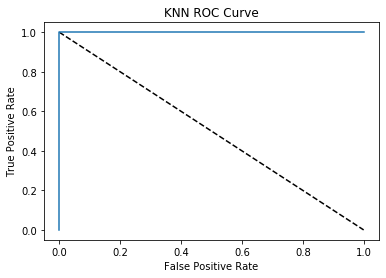

In [54]:
plt.plot([0, 1], [1, 0], 'k--')
plt.plot(fpr, tpr, label='KNN')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('KNN ROC Curve')
plt.show()